## Cook's Distance

Cook's distance is a measure used in linear regression to estimate the influence of a single observation on the regression model. It quantifies how much the predicted values of the dependent variable would change if a specific observation were removed from the dataset.
$$D_i = \frac{\sum_{j=1}^n  (\hat{y_j} - \hat{y}_{j(i)})^2} {p * MSE}$$

- $\hat{y_j}$: is the predicted value for the j-th observation using the full dataset. 
- $\hat{y}_{j(i)}$: is the predicted value for the j-th observation when the i-th observation is excluded from the model. 
- $p$: is the number of parameters in the regression model (including the intercept). 
- MSE: is the mean squared error of the regression model. 

#### Interpretation
- A higher Cook's distance value indicates that the corresponding observation has a greater influence on the regression model. 
- Observations with unusually high Cook's distance values might be influential points or outliers that warrant further investigation. 
- While there are no strict universal thresholds, common rules of thumb for identifying influential points include:     
    - Cook's distance greater than 0.5 or 1. 
    - Cook's distance greater than \(4/n\), where \(n\) is the number of observations.

### Toy example with `statsmodels`

In [29]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(326)  # for reproducibility
n_samples = 100

# Sample data
# Generate x values
x = np.linspace(0, 50, n_samples)

# Generate y values with some noise
y = 2 * x + 10 + np.random.normal(0, 5, n_samples)# Define response and explanatory variables

# Add some influential points
# Add a few outliers that will have high leverage
x = np.append(x, [5, 45, 48])  # Add points at extremes
y = np.append(y, [80, 20, 150])  # Add unusual y values

# Create new dataframe
df = pd.DataFrame({'x': x, 'y': y})

# Fit the model
X = sm.add_constant(df['x'])
model = sm.OLS(df['y'], X).fit()

# Calculate Cook's distance
influence = model.get_influence()
cooks_distance = influence.cooks_distance[0] # Extract Cook's distance values
print(cooks_distance[:10])
print(influence.cooks_distance[1][:10]) # Get the p-values for Cook's distance)

[3.83614708e-03 2.41177452e-05 1.63712817e-03 6.37507576e-05
 1.33135266e-05 9.46096946e-04 8.09272568e-04 8.11248268e-03
 3.00672207e-04 8.82977058e-03]
[0.99617135 0.99997588 0.99836424 0.99993625 0.99998669 0.99905436
 0.99919106 0.99192098 0.99969937 0.99120986]


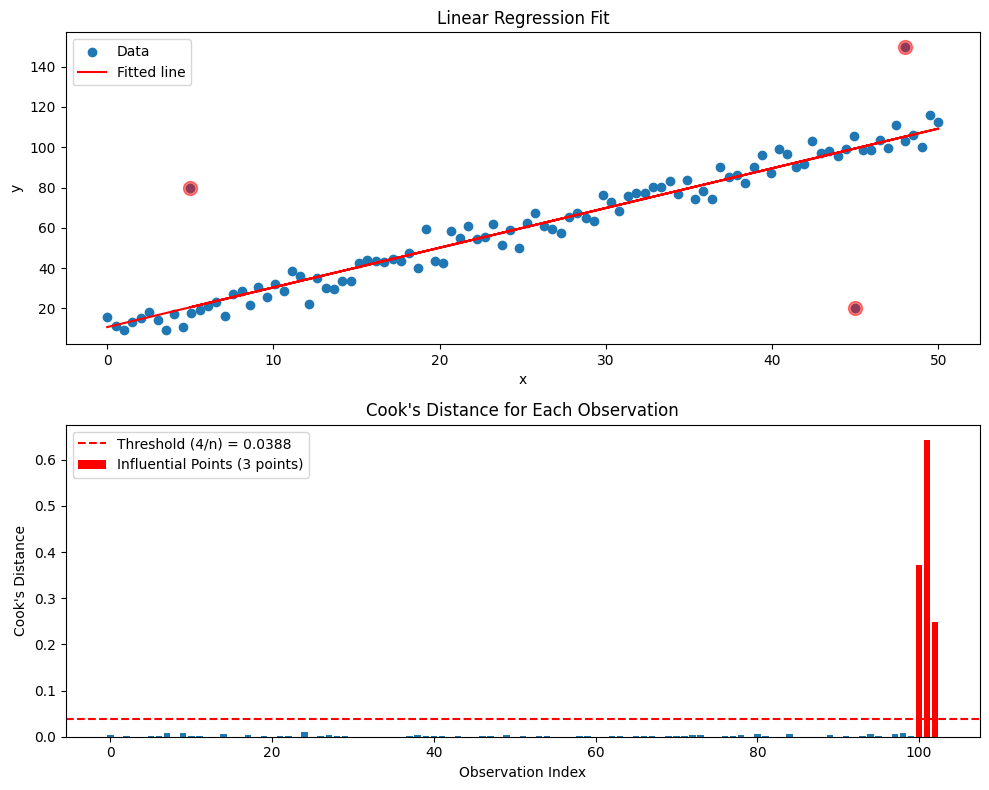


Summary of Influential Points:
        x      y  Cook's Distance
101  45.0   20.0         0.643685
100   5.0   80.0         0.371081
102  48.0  150.0         0.248965


In [30]:
# Extract parameters
intercept, slope = model.params
# Generate predicted y values
y_pred = intercept + slope * df['x']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# First subplot: Scatter plot with fitted line
ax1.scatter(df['x'], y, label='Data')
ax1.plot(df['x'], y_pred, color='red', label='Fitted line')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.set_title('Linear Regression Fit')

# Second subplot: Cook's distance
threshold = 4/len(df)
influential_points = cooks_distance > threshold

ax2.bar(range(len(cooks_distance)), cooks_distance)
ax2.axhline(y=threshold, color='r', linestyle='--', label='Threshold (4/n) = {:.4f}'.format(threshold))
ax2.set_xlabel('Observation Index')
ax2.set_ylabel("Cook's Distance")
ax2.set_title("Cook's Distance for Each Observation")

influential_indices = np.where(influential_points)[0]
ax2.bar(influential_indices, cooks_distance[influential_indices], color='red', 
        label=f'Influential Points ({sum(influential_points)} points)')
ax1.scatter(df['x'][influential_points], df['y'][influential_points], 
           color='red', s=100, alpha=0.5, label='Influential Points')
ax2.legend()

plt.tight_layout()
plt.show()

# Print summary of influential points
print("\nSummary of Influential Points:")
influential_df = df[influential_points].copy()
influential_df['Cook\'s Distance'] = cooks_distance[influential_points]
print(influential_df.sort_values('Cook\'s Distance', ascending=False))